In [37]:
using Plots

## Confidence Interval

In [44]:
# First order of business: set up a "measuring device"
measure_T() = 25 + randn()

measure_T (generic function with 1 method)

In [53]:
N = 10000
T_vec = []

for i in 1:N
    push!(T_vec, measure_T())
end

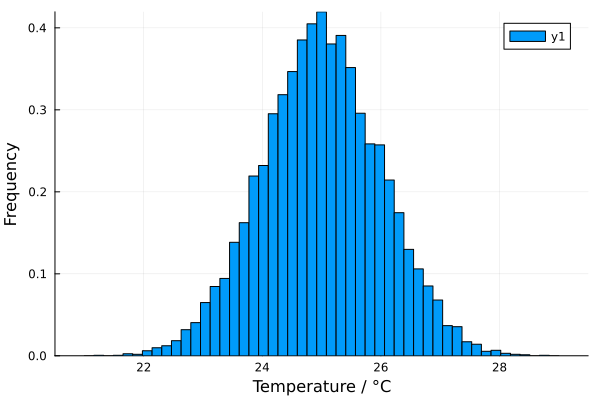

In [54]:
T_low = minimum(minimum.(T_vec))
T_up = maximum(maximum.(T_vec))
b_range = range(floor(T_low), ceil(T_up), 50)
histogram(T_vec, bins=b_range, normalize=:true, xlabel="Temperature / °C", ylabel="Frequency")

In [52]:
μ = sum(T_vec) / N
σ = sum(@. (T_vec - μ)^2) / (N-1)
std = sqrt(σ)

0.999095408493534

In [58]:
N_μ = 500
μ_vec = []

for i in 1:N_μ
    N = 10000
    T_vec = []
    for j in 1:N
        push!(T_vec, measure_T())
    end

    μ = sum(T_vec) / N
    σ = sum(@. (T_vec - μ)^2) / (N-1)
    std = sqrt(σ)
    push!(μ_vec, μ)
end

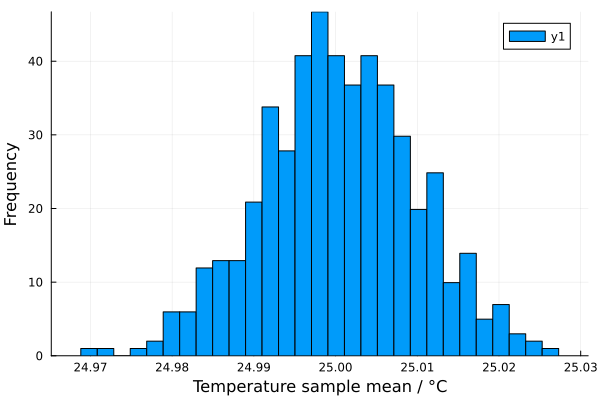

In [59]:
μ_low = minimum(minimum.(μ_vec))
μ_up = maximum(maximum.(μ_vec))
b_range = range(μ_low, μ_up, 30)
histogram(μ_vec, bins=b_range, normalize=:true, xlabel="Temperature sample mean / °C", ylabel="Frequency")

Calculating confidence interval:

$$ \mu = \bar{X} \pm t_{\frac{\alpha}{2},n-1} \frac{S}{\sqrt{n}} $$

- $\mu$: mean of the population
- $\bar{X}$: mean of the sample
- $\alpha$: confidence level (often $5%$ or $1%$)
- $n$: sample size, $n-1$ are the degrees of freedom
- $S$: standard deviation of the sample
- $t$: t-score (e.g., $1.96$ fo large sample size and $0.95$ confidence interval)

Note on t-score:
$$ t = \frac{\text{variance between groups}}{\text{variance within groups}} $$

Auch t-value has a corresponding p-value. The p-value is the probability that the pattern of data in the sample could be produced by random data (usually $p=.05$ ($5\%$ chance) or $p=.01$ ($1\%$ chance)).

Bigger samples help, but with diminishing returns. A good guidline is to aim for $20$ to $30$ datapoints in each group.

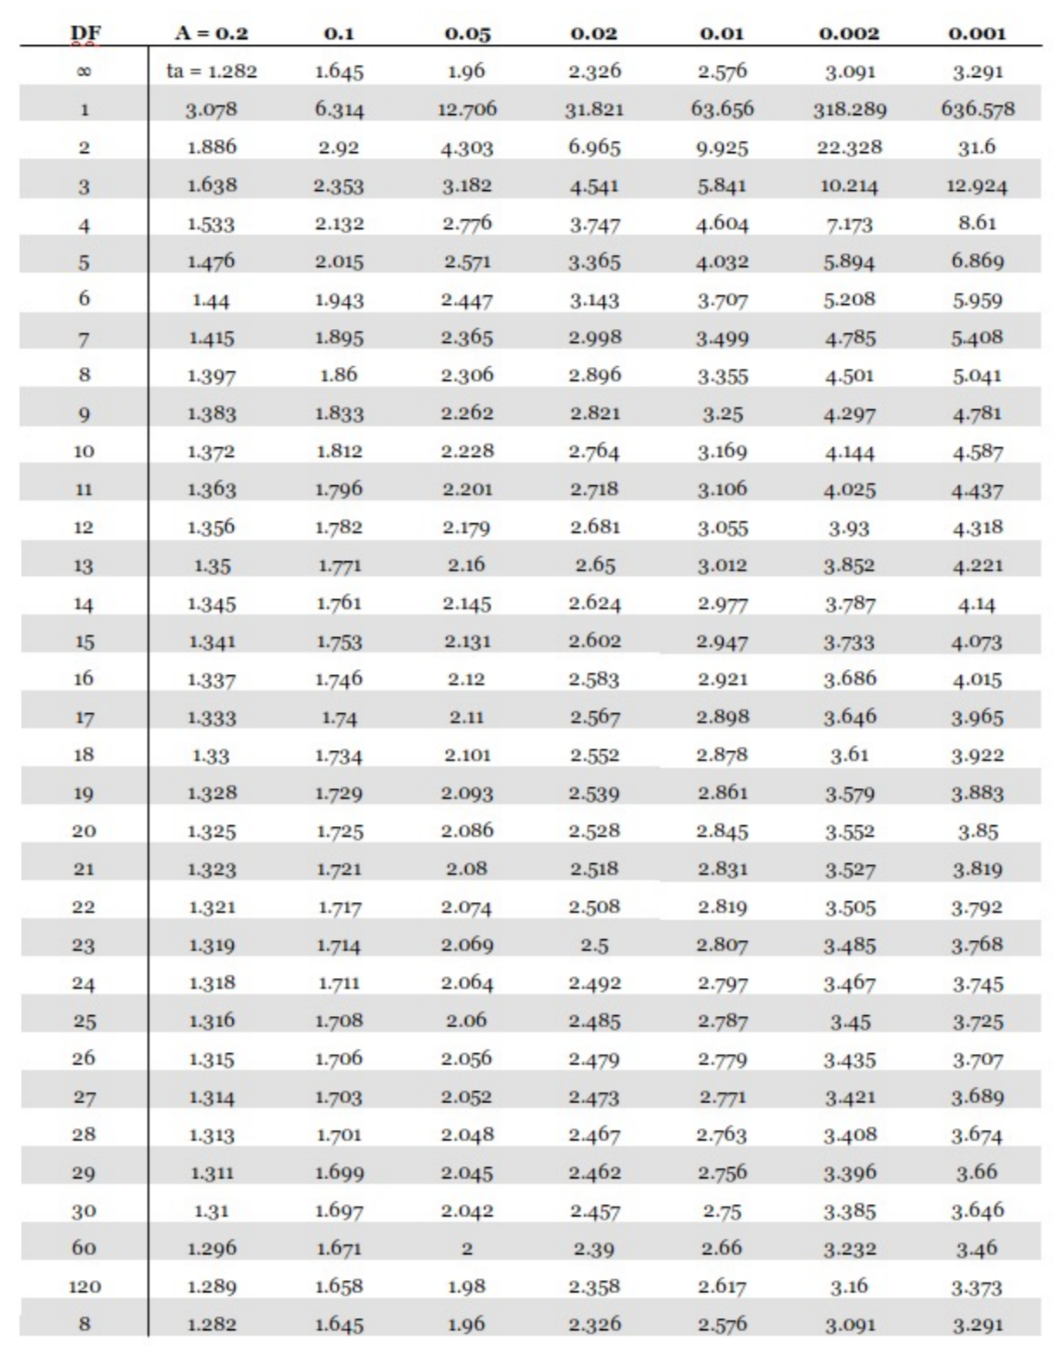

## Uncertainties

### Testing for normality

There are several tests available to determine if a given data set appears to be normally distributed:

1) Histogram
2) Q-Q plot
3) Skewness
4) Kurtosis
5) Kolmogorov-Smirnov
6) Shapiro-Wilk

> Note: if your data jumps between two values, you are most likely at the analog to digital resolution limit (not ideal to "average" from this data)

### Errors

Here is how you report a calculated error:
- round error to one significant figure, and then
- round value to match the position of the significant figure in the error.

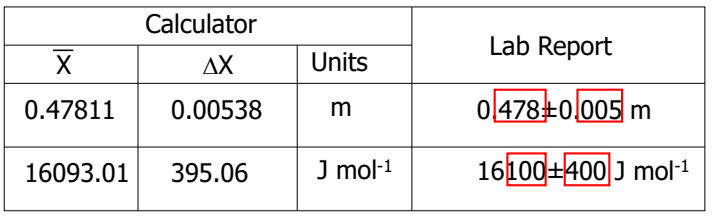

If we only have a __small sample__ size available:

- $n=1$: error is half the smallest division (?)
- $n \le 5$: error is half the range
        5.03, 5.19, 4.94, 4.75, 5.05 s
            error = (5.19 - 4.75) / 2 = 0.2 s
            t = 5.0 $\pm$ 0.2 s

__Error propagation:__

1. $ q = ax \pm b$ $\qquad \qquad \qquad \Delta q = a \Delta x$
2. $ q = x \pm y$ $\qquad \qquad \qquad (\Delta q)^2 = (\Delta x)^2 + (\Delta y)^2$
3. $ q = cxy$ or $q=cy/x$ $\qquad \quad (\Delta q / q)^2 = (\Delta x / x)^2 + (\Delta y / y)^2$
4. $ q = a/x$ $\qquad \qquad \qquad (\Delta q / q)^2 = (\Delta x / x)^2$

$a$, $b$, and $c$ constants with negligible error.

$ Q = a + b + c + \cdots - (x + y + \cdots + z) \qquad \delta Q = \sqrt{(\delta a)^2 + (\delta b)^2 + (\delta c)^2 + \cdots + (\delta x)^2 + (\delta y)^2 + \cdots + (\delta z)^2} $

$ Q = \frac{a b \cdots c}{x y \cdots z} \qquad \frac{\delta Q}{|Q|} = \sqrt{ \left( \frac{\delta a}{a} \right)^2 + \left(\frac{\delta b}{b} \right)^2 + \left(\frac{\delta c}{c} \right)^2 + \cdots + \left( \frac{\delta x}{x} \right)^2 + \left( \frac{\delta y}{y} \right)^2 + \cdots + \left( \frac{\delta z}{z} \right)^2 }$

$ Q = x^n \qquad \frac{\delta Q}{|Q|} = |n| \frac{\delta x}{|x|} $

## Linear Regression

Key ideas:
1) Use least-squares to fit a line to the data.
2) Calculate $R^2$.
3) Calculate a $p$-value for $R^2$.

We might guess from the fit that data is correlated.
Calculating $R^2$ is the first step in determining how good that guess will be. $R^2$ tells us how much of the variation in mouse size can be explained by taking mouse weight into account.

$$ R^2 = \frac{\text{Var(mean)} - \text{Var(fit)}}{\text{Var(mean)}} $$

In [ ]:
using LinearAlgebra

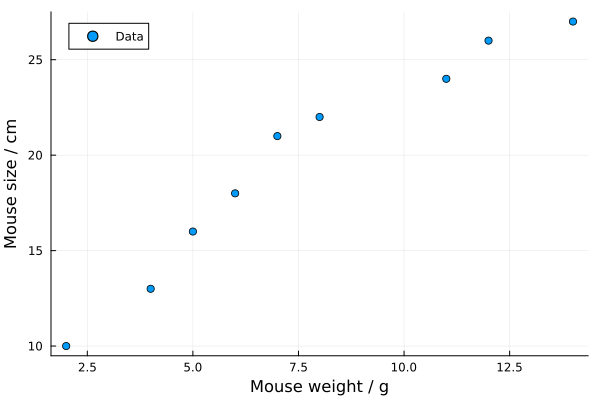

In [97]:
# Data
msize = [10, 13, 16, 18, 21, 22, 24, 26, 27]
mweight = [2, 4, 5, 6, 7, 8, 11, 12, 14]
scatter(mweight, msize, xlabel="Mouse weight / g", ylabel="Mouse size / cm", label="Data")

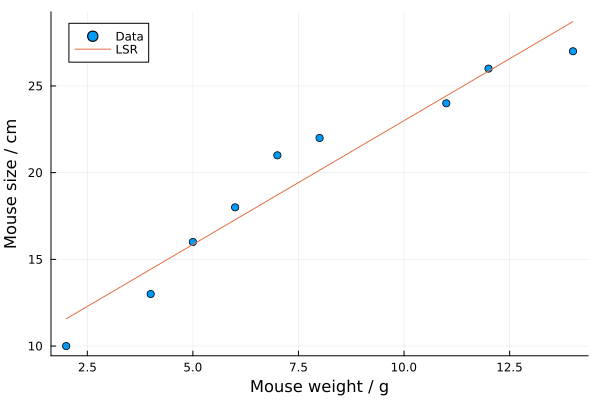

In [98]:
# LSR
A = [ones(length(mweight)) mweight]
a,b = inv(A'*A)*A'*msize
plot!(mweight, a.+b.*mweight, label="LSR")